In [20]:
from sympy import solveset
from sympy.abc import x
from sympy import pprint
from sympy import re,im
import matplotlib.pyplot as plt
from matplotlib.axes import Axes




In [31]:
# Problem 1-Part C) ROOT SOLVER for various Kc values
  
#Given values
Kc = [5,15,30,45,60,75]
Kp = 0.503 
tau = 12.4 #min

for cst in Kc:
    roots = solveset((tau*x+1)**3+(Kp**3)*cst,x)
    print("The roots for Kc = %d"%cst)
    for root in roots:
        print(root.round(4))
    print("")    

The roots for Kc = 5
-0.1500
-0.046 - 0.0601*I
-0.046 + 0.0601*I

The roots for Kc = 15
-0.1807
-0.0306 - 0.0866*I
-0.0306 + 0.0866*I

The roots for Kc = 30
-0.2067
-0.0176 - 0.1092*I
-0.0176 + 0.1092*I

The roots for Kc = 45
-0.2249
-0.0085 - 0.125*I
-0.0085 + 0.125*I

The roots for Kc = 60
-0.2394
-0.0012 - 0.1375*I
-0.0012 + 0.1375*I

The roots for Kc = 75
-0.2517
0.0049 - 0.1481*I
0.0049 + 0.1481*I



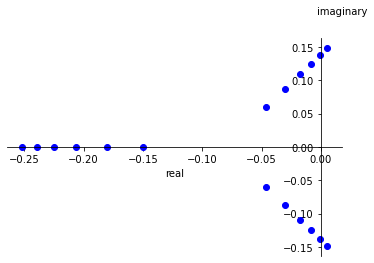

In [22]:
#Problem 1-Part D) Plot root locus plot
fig, ax = plt.subplots()
ax.set_xlabel("real")
ax.set_ylabel("imaginary",rotation=0)
ax.spines["left"].set_position(("data", 0))
ax.spines["bottom"].set_position(("data", 0))
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.yaxis.set_label_coords(1,1.1)

for cst in Kc:
    roots = solveset((tau*x+1)**3+(Kp**3)*cst,x)
    for root in roots:
        #This is always true since all real numbers are complex numbers with 0j
        if root.is_complex:
            #cast root as complex since they are sympy objects
            val = complex(root)
            real = re(root)
            imaginary = im(root)
            plt.plot(val.real,val.imag,"bo")
            #plt.annotate(s,(val.real,val.imag),xytext=(0,cst-3),textcoords='offset points',arrowprops=dict(arrowstyle="->",
                            #connectionstyle="arc3"),)
        #Just in case the root is a different type   
        else:
            plt.plot(root,0,"bo")
            plt.plot(root,0,"bo")
            #plt.annotate(s,(val.real,val.imag), xytext=(-20, 20),
            #textcoords='offset points',ha="left", va='bottom',
            #arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))
 



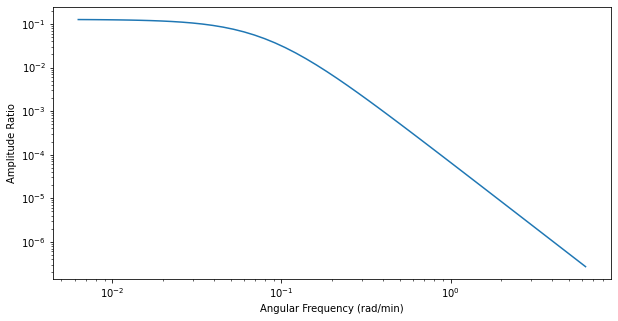

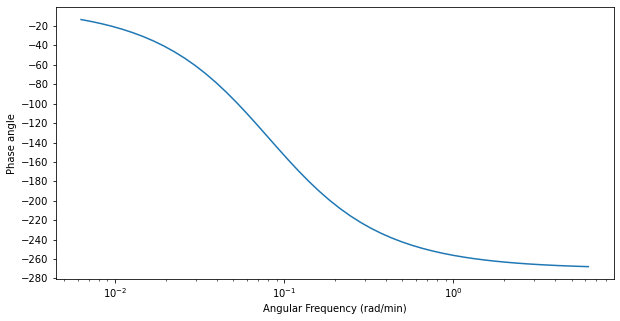

In [23]:
#BODE STABILITY: Problem 2-PART C
from pylab import *

def G(w):
    Kp= 0.503  #process or disturbance gain here
    tau= 12.4  # time constant here
    Kc = 1
    #TODO: #your function here; 1j is the syntax for sqrt(-1)
    Gol = Kp**3*Kc*(1-tau*1j*w)**3/(1+tau**2*w**2)**3
    return  Gol

f=logspace(-3,0)*2*pi # frequencies from 0.01 to 10, in angular frequencies
Gol=G(f)

AR=abs(Gol)
phi=angle(Gol)*180/pi


# Correct phi for postive angles
for i in range(len(phi)):
    if(phi[i]>0.0):
        phi[i]-=360
        
fig1, ax1 = plt.subplots(figsize=(10,5))
ax1.set_xlabel("Angular Frequency (rad/min)")
ax1.set_ylabel("Amplitude Ratio")
ax1.set_xscale('log')
ax1.set_yscale('log')

ax1.plot(f,abs(Gol))

fig2, ax2 = plt.subplots(figsize=(10,5))
ax2.set_xlabel("Angular Frequency (rad/min)")
ax2.set_ylabel("Phase angle")
ax2.set_xscale('log')

ax2.set_yticks(np.arange(0,-300,-20))
ax2.plot(f,phi)


[phi,w,AR]= -13.365000886572856 0.006283185307179587 7.945149539815979
[phi,w,AR]= -15.378323832062271 0.007234430655802104 7.9217861768257505
[phi,w,AR]= -17.691192100434925 0.00832969017383676 7.8909891439491515
[phi,w,AR]= -20.346227751701672 0.009590766943970357 7.850467693480961
[phi,w,AR]= -23.391112463186513 0.011042764935299638 7.797280072281344
[phi,w,AR]= -26.878662590104387 0.012714588742347424 7.727688769511563
[phi,w,AR]= -30.866593170835955 0.014639518982266661 7.637013630115999
[phi,w,AR]= -35.41679292450833 0.01685587480453402 7.519509053707184
[phi,w,AR]= -40.59387096075422 0.019407776701563063 7.368312274641935
[phi,w,AR]= -46.46267469896949 0.022346024805334715 7.175538212287003
[phi,w,AR]= -53.08443969482405 0.025729110154097082 6.932628965025634
[phi,w,AR]= -60.51125774397728 0.029624379060190748 6.631090281540684
[phi,w,AR]= -68.77870519389377 0.03410937375780636 6.26373660211451
[phi,w,AR]= -77.8968379633442 0.03927337601864452 5.82647865567142
[phi,w,AR]= -87.84

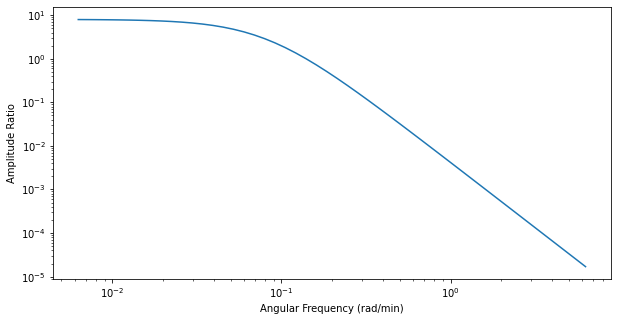

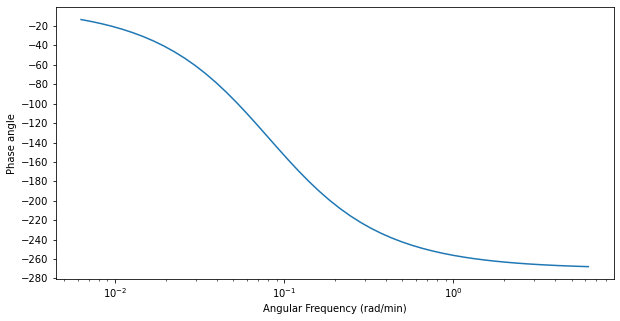

In [24]:
#BODE STABILITY: Problem 2-Part F) Changing Kc until instability
from pylab import *


def G(w):
    Kp= 0.503  #process or disturbance gain here
    tau= 12.4  # time constant here
    Kc = 63
    #TODO: #your function here; 1j is the syntax for sqrt(-1)
    Gol = Kp**3*Kc*(1-tau*1j*w)**3/(1+tau**2*w**2)**3
    return  Gol

f=logspace(-3,0)*2*pi # frequencies from 0.01 to 10, in angular frequencies
Gol=G(f)

AR=abs(Gol)
phi=angle(Gol)*180/pi


# Correct phi for postive angles
for i in range(len(phi)):
    if(phi[i]>0.0):
        phi[i]-=360
        
fig1, ax1 = plt.subplots(figsize=(10,5))
ax1.set_xlabel("Angular Frequency (rad/min)")
ax1.set_ylabel("Amplitude Ratio")
ax1.set_xscale('log')
ax1.set_yscale('log')

ax1.plot(f,abs(Gol))

fig2, ax2 = plt.subplots(figsize=(10,5))
ax2.set_xlabel("Angular Frequency (rad/min)")
ax2.set_ylabel("Phase angle")
ax2.set_xscale('log')

ax2.set_yticks(np.arange(0,-300,-20))
ax2.plot(f,phi)

#Critical frequency is when phi (phase angle) is -180 degrees. Past -180 degrees, the system is instable for the process parameters
for angle,w,ar in zip(phi,f,AR):
    print("[phi,w,AR]=",angle,w,ar)

In [25]:
#PROBLEM 4-8: Find AR for a single w
from pylab import *
def G(w):
    Kp= 1  #process or disturbance gain here
    tau= 7.9 # time constant here
    Kc = 2
    Gol = Kp*Kc/((2+tau*1j*w)*(1+tau*1j*w))
    return  Gol

freq = 5 #min
w = 2*pi/freq #rad/min
Gol = G(w)
AR=abs(Gol)
phi=angle(Gol)*180/pi
print("For w=",w,"rad/min")
print(AR,phi)

For w= 1.2566370614359172 rad/min
0.01979359468594894 -162.85749081286346


'\nfig4, ax4 = plt.subplots(figsize=(10,5))\nax4.set_xlabel("Angular Frequency (rad/min)")\nax4.set_ylabel("Phase angle")\nax4.set_xscale(\'log\')\n\nax4.set_yticks(np.arange(0,-300,-20))\nax4.plot(f,phi2)\n'

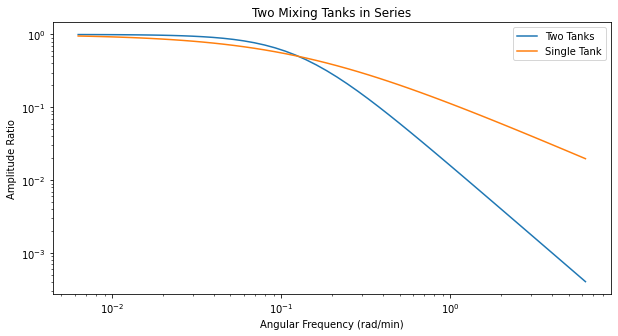

In [26]:
#PROBLEM 4-8: C) Plot AR and phi vs. w for singular and double mixing tanks to determine which equipment should be used
from pylab import *

#Two tanks
def G(w):
    Kp= 1  #process or disturbance gain here
    tau= 7.9 # time constant here
    Kc = 1
    #TODO: #your function here; 1j is the syntax for sqrt(-1)
    Gol = Kp*Kc/((tau*1j*w+1)**2)
    return  Gol

def singleTank(w):
    Kp= 1  #process or disturbance gain here
    tau =7.9 # time constant here
    Kc = 1
    #TODO: #your function here; 1j is the syntax for sqrt(-1)
    Gol = 1/(tau*w*1+1)
    return  Gol

f=logspace(-3,0)*2*pi # frequencies from 0.01 to 10, in angular frequencies

Gol=G(f)
AR=abs(Gol)
phi=angle(Gol)*180/pi


# Correct phi for postive angles
for i in range(len(phi)):
    if(phi[i]>0.0):
        phi[i]-=360

Gol2=singleTank(f)
AR2=abs(Gol2)
phi2=angle(Gol2)*180/pi
for i in range(len(phi2)):
    if(phi2[i]>0.0):
        phi2[i]-=360        
        
fig1, ax1 = plt.subplots(figsize=(10,5))
ax1.set_xlabel("Angular Frequency (rad/min)")
ax1.set_ylabel("Amplitude Ratio")
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_title("Two Mixing Tanks in Series")
ax1.plot(f,abs(Gol),label="Two Tanks")
ax1.plot(f,abs(Gol2),label="Single Tank")
ax1.legend()
""""
fig2, ax2 = plt.subplots(figsize=(10,5))
ax2.set_xlabel("Angular Frequency (rad/min)")
ax2.set_ylabel("Phase angle")
ax2.set_xscale('log')

ax2.set_yticks(np.arange(0,-300,-20))
ax2.plot(f,phi)
"""

"""
fig3, ax3 = plt.subplots(figsize=(10,5))
ax3.set_xlabel("Angular Frequency (rad/min)")
ax3.set_ylabel("Amplitude Ratio")
ax3.set_xscale('log')
ax3.set_yscale('log')
ax3.set_title("Singular Mixing Tank")
ax3.plot(f,abs(Gol2))
"""

"""
fig4, ax4 = plt.subplots(figsize=(10,5))
ax4.set_xlabel("Angular Frequency (rad/min)")
ax4.set_ylabel("Phase angle")
ax4.set_xscale('log')

ax4.set_yticks(np.arange(0,-300,-20))
ax4.plot(f,phi2)
"""